In [19]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

In [20]:
iris = load_iris()

In [21]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [22]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [23]:
df['target'] = iris.target
df['target names'] = df['target'].apply(lambda x:  iris.target_names[x] )

In [24]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [25]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

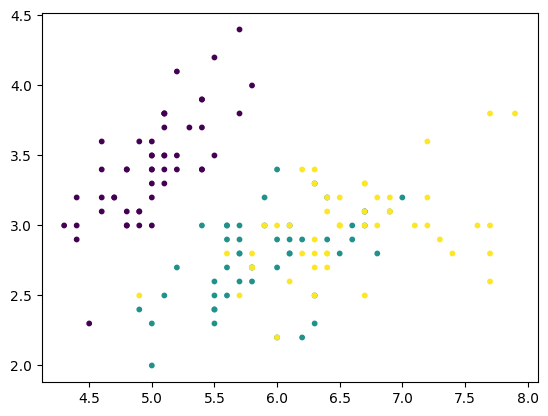

In [26]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], s=10,  c=df['target'])

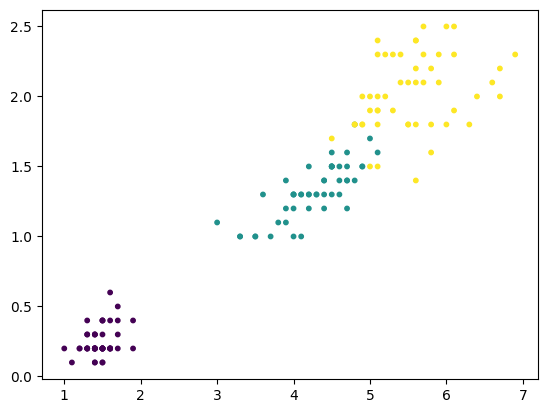

In [27]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], s=10, c=df['target'])

In [28]:
X, y = df.drop(['target', 'target names'], axis=1), df.target

In [29]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
model = GridSearchCV(SVC(gamma='auto'), {'C': [1,10, 20], 'kernel': ['rbf', 'kernel']}, cv=5)

In [38]:
model.fit(X_train, y_train)

g:\Machine Learning Projects\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "g:\Machine Learning Projects\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "g:\Machine Learning Projects\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "g:\Machine Learning Projects\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "g:\Machine Learning Project

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': [1, 10, 20], 'kernel': ['rbf', 'kernel']})

In [41]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.089290,0.166620,0.004802,3.920658e-03,1,rbf,"{'C': 1, 'kernel': 'rbf'}",1.000000,1.0,1.000000,0.958333,0.958333,0.983333,0.020412,1
1,0.000000,0.000000,0.000000,0.000000e+00,1,kernel,"{'C': 1, 'kernel': 'kernel'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2,0.011184,0.003918,0.007995,5.055282e-03,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.958333,1.0,0.958333,0.958333,0.958333,0.966667,0.016667,2
3,0.001598,0.003197,0.000000,0.000000e+00,10,kernel,"{'C': 10, 'kernel': 'kernel'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,0.007994,0.005055,0.007993,7.599534e-07,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.916667,1.0,0.958333,0.916667,0.958333,0.950000,0.031180,3
5,0.003197,0.003915,0.000000,0.000000e+00,20,kernel,"{'C': 20, 'kernel': 'kernel'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [42]:
model.best_params_

{'C': 1, 'kernel': 'rbf'}

In [43]:
model.best_score_

0.9833333333333334

In [39]:
model.score(X_test, y_test)

0.9666666666666667

In [32]:
y_pred = model.predict(X_test)

In [33]:
cm = confusion_matrix(y_test, y_pred)


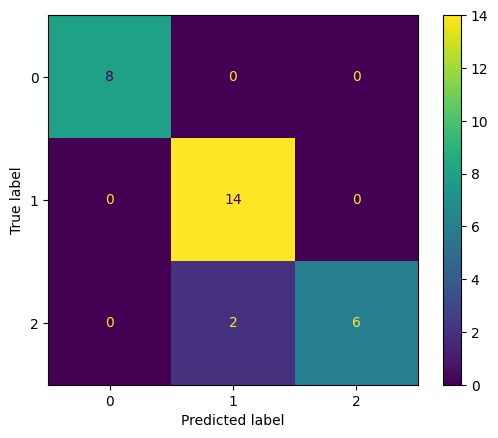

In [34]:
ConfusionMatrixDisplay(cm).plot()

In [35]:
cross_val_score(KNeighborsClassifier(n_neighbors=10),X_train, y_train, cv=5)

array([1.        , 1.        , 1.        , 0.95833333, 0.91666667])

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.88      1.00      0.93        14
           2       1.00      0.75      0.86         8

    accuracy                           0.93        30
   macro avg       0.96      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30

